In [1]:
!wget https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png

--2021-07-24 05:42:59--  https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203705 (199K) [image/png]
Saving to: ‘basketball.png’

basketball.png      100%[===================>] 198.93K  --.-KB/s    in 0.03s   

2021-07-24 05:43:00 (6.28 MB/s) - ‘basketball.png’ saved [203705/203705]



In [3]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
# 画像の読み込み
img = image.load_img('basketball.png', target_size=(224, 224))

# PIL形式からnumpy形式に変換
img_numpy = image.img_to_array(img).astype('uint8')
print('元のshape:', img_numpy.shape)
# 次元追加
img_numpy = np.expand_dims(img_numpy, axis=0)
print('変換後のshape:', img_numpy.shape)

元のshape: (224, 224, 3)
変換後のshape: (1, 224, 224, 3)


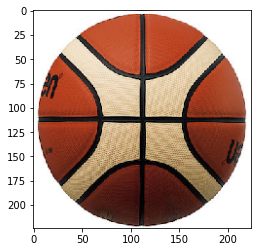

In [5]:
plt.imshow(img_numpy[0])

(1, 224, 224)
(1, 224, 224, 1)


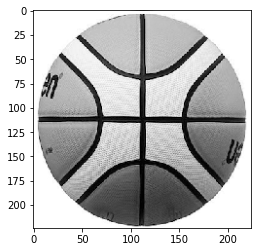

In [6]:
x = img_numpy[:, :, :, 0]
print(x.shape)
x = np.expand_dims(x, axis=3)
print(x.shape)
plt.imshow(np.squeeze(x), cmap='gray')

In [7]:
# convolution layer
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=1, kernel_size=(3, 3), input_shape=(224, 224, 1))
])

weight.shape: (3, 3, 1, 1)


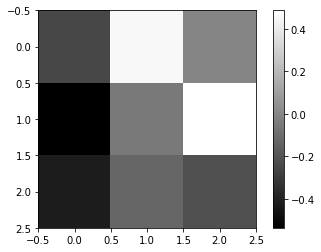

In [8]:
weight, bias = model.layers[0].get_weights()
print('weight.shape:', weight.shape)
# フィルターの4つ目の次元を除外し、ゼロチャンネル目を描画
plt.imshow(np.squeeze(weight[:, :, 0]), cmap='gray')
plt.colorbar()

In [10]:
w1 = np.array([[[[1]], [[0]], [[-1]]],
              [[[2]], [[0]], [[-2]]],
              [[[1]], [[0]], [[-1]]]],
              dtype='float32')
print(w1.shape)

(3, 3, 1, 1)


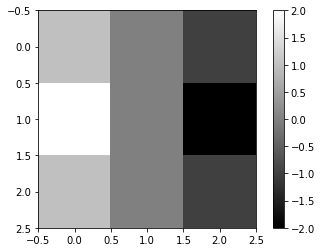

In [11]:
# 先ほど用意したconvolution layerにフィルターをセット
b = np.array([0.], dtype='float32')
model.layers[0].set_weights([w1, b])
# フィルターの可視化
plt.imshow(np.squeeze(model.layers[0].get_weights()[0][:, :, 0]), cmap='gray')
plt.colorbar()

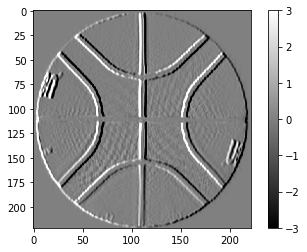

In [12]:
filtered = model.predict(x)
filtered -= filtered.mean()
filtered /= filtered.std()
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=-3, vmax=3)
plt.colorbar()